### Imports

In [64]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualizer import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualizer
import logic

import importlib

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualizer)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

### Dataset creation

In [75]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 5000  # Number of data points
epochs = 100  # Number of training epochs
l = [50]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-10, 10)))
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [76]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=5)

### Sampled Netwrok training.

In [77]:
y_nn_train = model_nn.predict(dataset.X_train)

model_sampled = SampledNet()
alpha, radius = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.1)

y_sampled_test = model_sampled.predict(dataset.X_test)
y_sampled_train = model_sampled.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)

print(f"mse: y_test, y_nn_test           {loss_r2(y_nn_test, dataset.y_test)}")
print(f"mse: y_test, y_sampled_test      {loss_r2(y_sampled_test, dataset.y_test)}")
print(f"mse: y_sampled_train, y_nn_train {loss_r2(y_sampled_train, y_nn_train)}")
print(f"mse: y_sampled_test,  y_nn_test  {loss_r2(y_sampled_test, y_nn_test)}")

Layer1 sampling: 100%|██████████| 50/50 [00:07<00:00,  6.65it/s]

mse: y_test, y_nn_test           0.18954514789290244
mse: y_test, y_sampled_test      0.13801838681431983
mse: y_sampled_train, y_nn_train 0.5257210170646074
mse: y_sampled_test,  y_nn_test  0.5314025977534842


### Plot the weights' angles differences, and prediction vs actual visualization

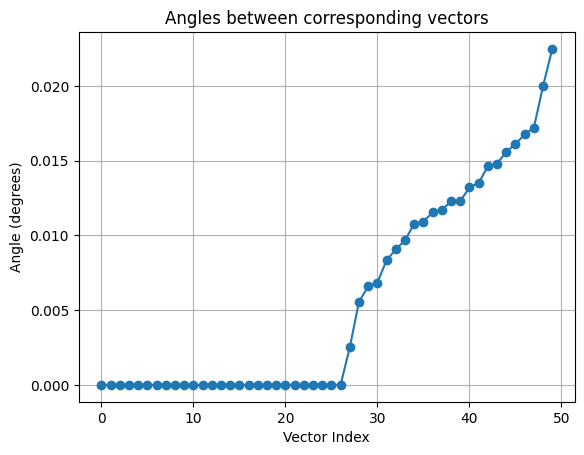

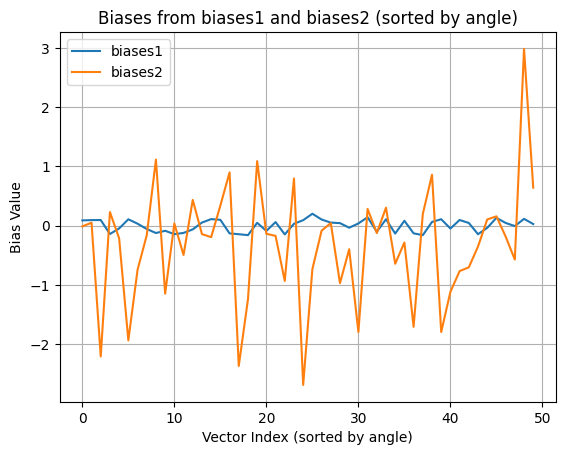

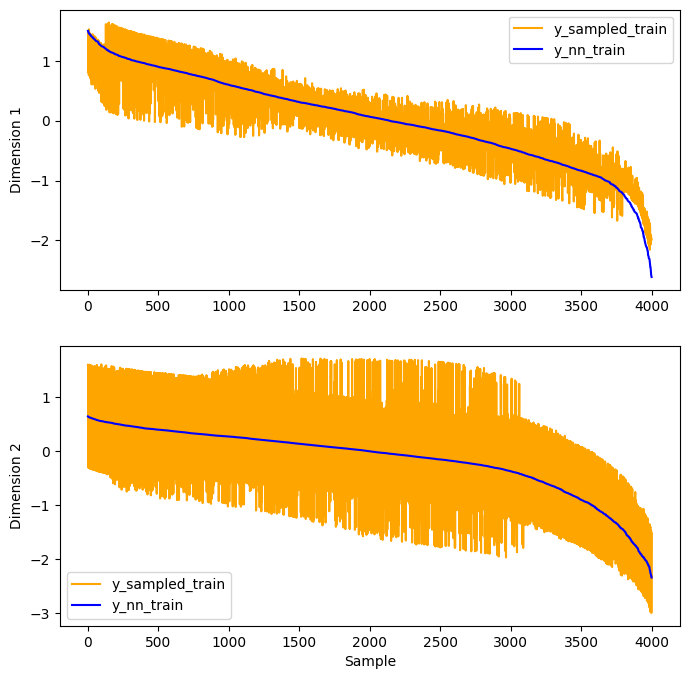

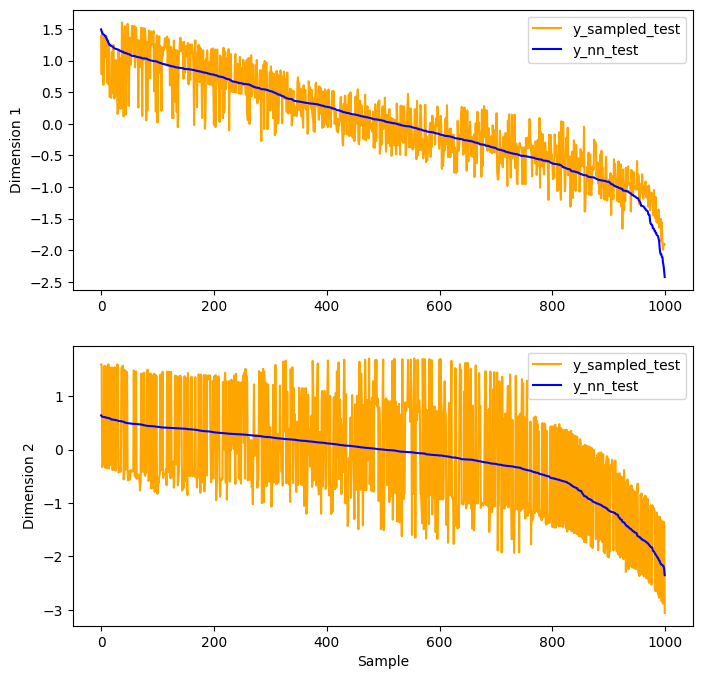

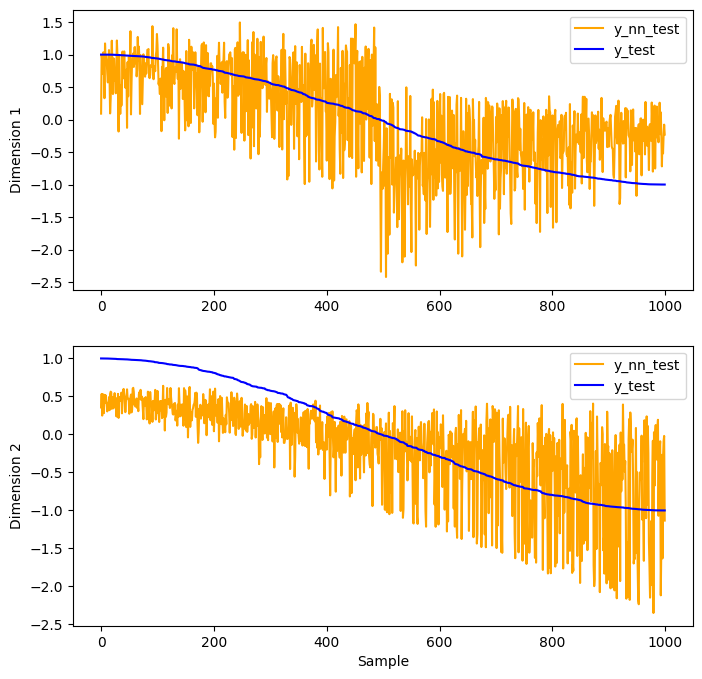

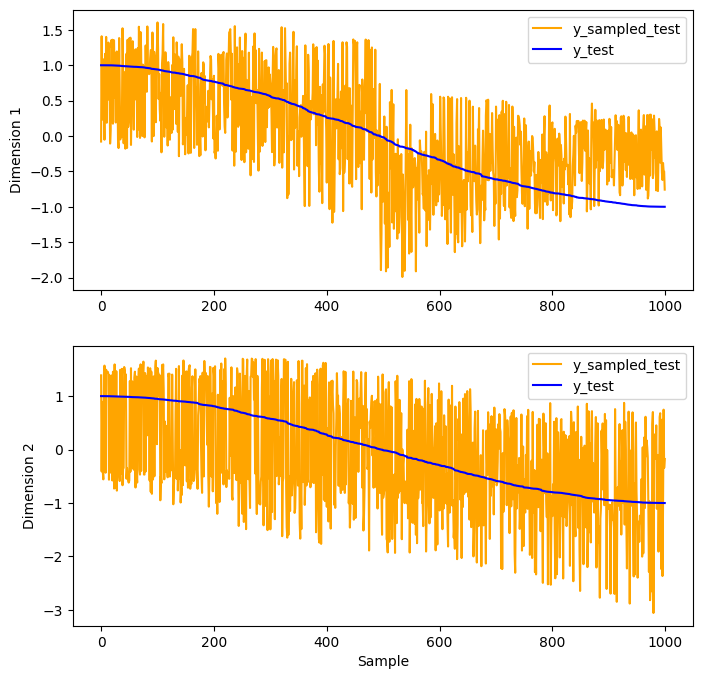

In [78]:
plot_weight_biases_differences(
    model_nn.weights[0], model_sampled.weights[0], model_nn.biases[0], model_sampled.biases[0]
)
visualize_data(y_nn_train, y_sampled_train, "y_nn_train", "y_sampled_train")
visualize_data(y_nn_test, y_sampled_test, "y_nn_test", "y_sampled_test")
visualize_data(dataset.y_test, y_nn_test, "y_test", "y_nn_test")
visualize_data(dataset.y_test, y_sampled_test, "y_test", "y_sampled_test")

### Calculate loss vs alpha, radius.

In [20]:
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)
weight1 = []
weight2 = []
losses = []
radii = np.linspace(0, 0.5, 6)
for radius in radii:
    model_sampled = SampledNet()
    alpha, radius = model_sampled.fit(
        dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=radius, alpha=-1, verbose=0
    )
    weight1.append(model_sampled.weights[0])
    weight2.append(model_nn.weights[0])
    y_sampled_test = model_sampled.predict(dataset.X_test)
    loss_sampled_nn = loss_mse(y_sampled_test, y_nn_test)
    losses.append(loss_sampled_nn)
    print(loss_sampled_nn)

Layer1 sampling:   0%|          | 0/200 [00:00<?, ?it/s]

Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 1784.31it/s]


1.0071942516826604


Layer1 sampling: 100%|██████████| 200/200 [00:15<00:00, 13.20it/s]


0.13901621308378742


Layer1 sampling:  11%|█         | 22/200 [00:03<00:27,  6.37it/s]


KeyboardInterrupt: 

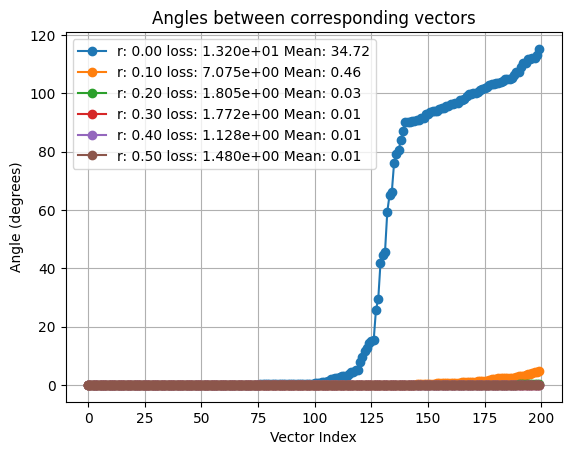

In [ ]:
plot_vector_differences(weight1, weight2, radii, losses)